# House Loan Prediction

Welcome to this notebook on loan prediction practice problem.
Expectations from the notebook:
1. Introducion to the problem
2.Exploratory data analysis 
3.Model building

Steps to follow

Table of contents:

1.Problem Statement

2.Hypothesis generation

3.Loading the data

4.Understanding the data

5.Exploratory data analysis i.e Univarint analysis and bivariant analysis

6.Missing values and outlier treatment

7.Feature engineering

8.Model building - Logistic regression, Desicion tree & Random forest.



Problem statement

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.The Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s).Classification can be of two types:

Supervised: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features.

Binary Classification : In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.

Multiclass Classification : Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc

Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.

Hypothesis testing

Below are some of the factors which can affect the loan approval(dependent variable for this loan prediction problem)

Salary: Applicants with high income should have high chances of loan approval

Previous history: Applicants who have repayed previous loans should have higher chances of getting the loan

Loan Amount:Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

Loan term: Loans for less time and less amount should have higher chances of approval

EMI: The Lesser the amount to be paid monthly, to repay the loan, the higher the chances of loan approval

In [576]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [577]:
train = pd.read_csv(r'C:\Users\Spectre\Downloads\home loan\Train_Loan_Home.csv')

In [578]:
test = pd.read_csv(r'C:\Users\Spectre\Downloads\home loan\Test_Loan_Home.csv')

In [579]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [580]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [581]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [582]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [406]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [407]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [408]:
test.shape

(367, 12)

In [409]:
train.shape

(614, 13)

# Univariate Analysis

We look at each variable individually. For categorical data we use : bar plots, frequency tables and for numeric data we use probability density plots.

Target variable

In [410]:
train['Loan_Status'].count()

614

In [411]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [412]:
train['Loan_Status'].value_counts(normalize = True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

Text(0.5, 1.0, 'Loan Status')

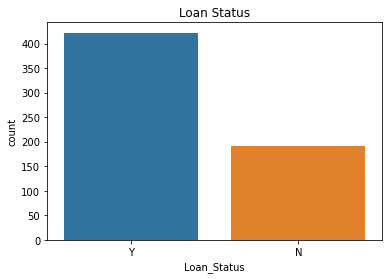

In [413]:
sns.countplot(x = 'Loan_Status', data = train)
plt.title('Loan Status')

Analysis on Gender

In [414]:
train['Gender'].count()

601

In [415]:
train['Gender'].value_counts(normalize = True)*100

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

Text(0.5, 1.0, 'Gender')

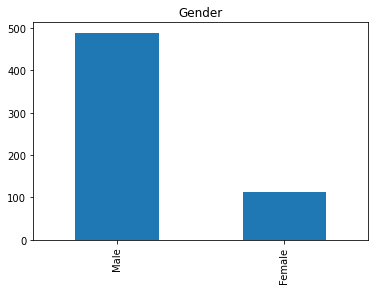

In [416]:
train['Gender'].value_counts().plot(kind='bar')
plt.title('Gender')

Married



In [417]:
train['Married'].count()

611

In [418]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

Text(0.5, 1.0, 'Married')

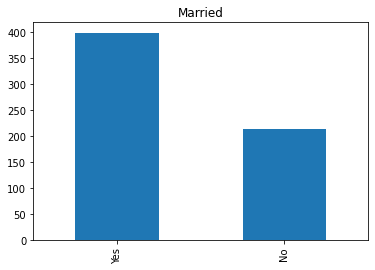

In [419]:
train['Married'].value_counts().plot(kind = 'bar')
plt.title('Married')

In [420]:
train['Self_Employed'].count()

582

In [421]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Text(0.5, 1.0, 'Self Employed')

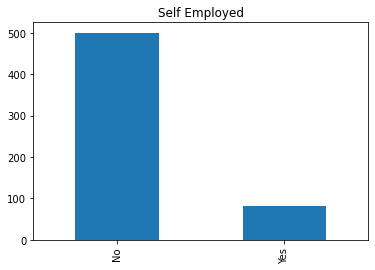

In [422]:
train['Self_Employed'].value_counts().plot(kind = 'bar')
plt.title('Self Employed')

Analysis on credit history

In [423]:
train['Credit_History'].count()

564

In [424]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Text(0.5, 1.0, 'Credit History')

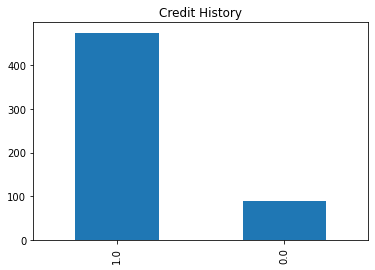

In [425]:
train['Credit_History'].value_counts().plot(kind = 'bar')
plt.title('Credit History')

Repaid debts = 475
Non- repaid debts = 89

# Independent (Ordinal variables)

Analysis on dependents

In [426]:
train['Dependents'].count()

599

In [427]:
train['Dependents'].value_counts(normalize = True)*100

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64

Text(0.5, 1.0, 'Dependents')

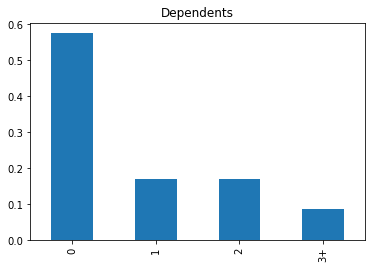

In [428]:
train['Dependents'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('Dependents')

58% of people have 0 dependents,
17%of the people have 1 dependents,
17% of people have 2 dependents,
8% of people have 3+ dependents

Analysis on education

In [429]:
train['Education'].count()

614

In [430]:
train['Education'].value_counts(normalize = True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

Text(0.5, 1.0, 'Education')

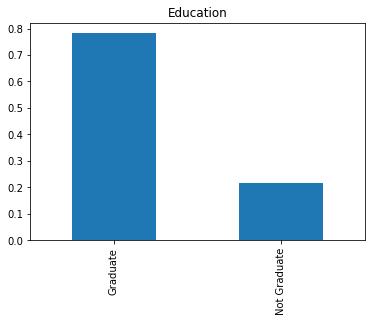

In [431]:
train['Education'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('Education')

ANALSIS ON PROPERTY AREA

In [432]:
train['Property_Area'].count()

614

In [433]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Text(0.5, 1.0, 'Property Area')

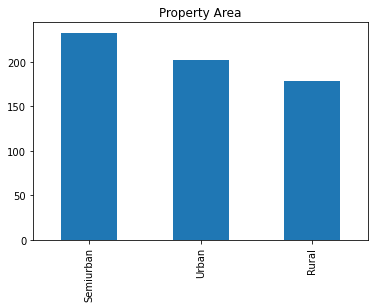

In [434]:
train['Property_Area'].value_counts().plot(kind = 'bar')
plt.title('Property Area')

233 people live in the semi urban area

202 people live in the urban area

179 people live in the rural area

# Independent numeric variables

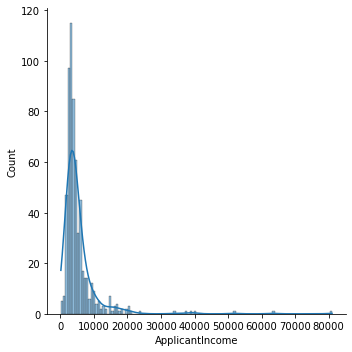

In [435]:
sns.displot(train['ApplicantIncome'], kde= True)

C:\Users\Spectre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

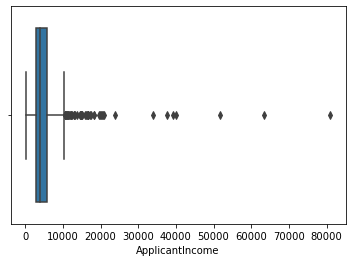

In [436]:
sns.boxplot(train['ApplicantIncome'], orient='h')

<AxesSubplot:xlabel='ApplicantIncome'>

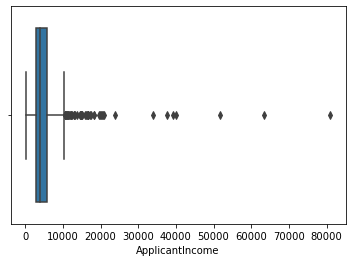

In [437]:
sns.boxplot(x='ApplicantIncome', data = train, hue = 'Education',orient = 'h')

CO-APPLICANT INCOME 

C:\Users\Spectre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

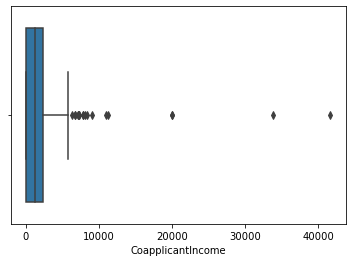

In [438]:
sns.boxplot(train['CoapplicantIncome'])

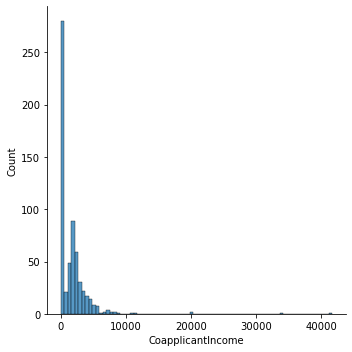

In [583]:
sns.displot(train['CoapplicantIncome'])

<AxesSubplot:>

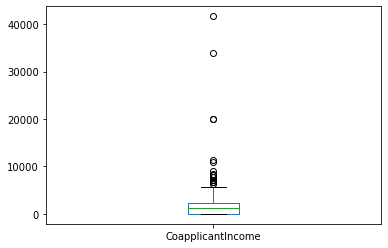

In [440]:
train['CoapplicantIncome'].plot(kind = 'box')

We see most Coapplicants income ranges from 0- 5000, we also have a number of outliers and the distribution is not normally distributed

# Distribution of loan amount variable

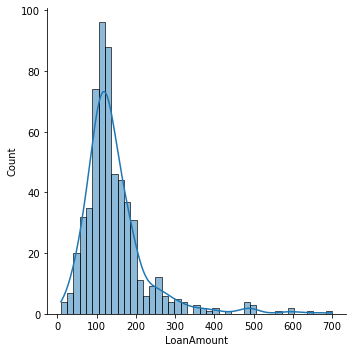

In [441]:
sns.displot(train['LoanAmount'], kde = True)

<AxesSubplot:>

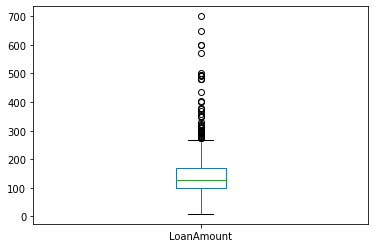

In [442]:
train['LoanAmount'].plot(kind = 'box')

The highest loan amount range borrowed is between 100 - 200, There are outliers and the distribution is not normally distributed

Distribution of loan amount term

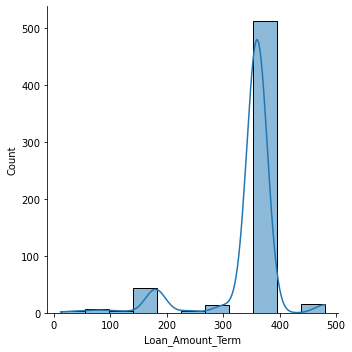

In [443]:
sns.displot(train['Loan_Amount_Term'], kde = True)

<AxesSubplot:>

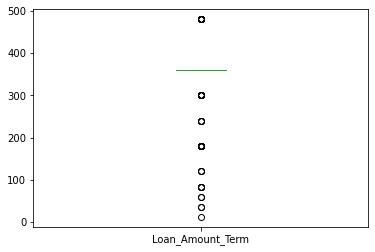

In [444]:
train['Loan_Amount_Term'].plot(kind = 'box')

So many outliers and the distribution is fairly normal

# BIVARIATE ANALYSIS

After looking at each variable individually, we then look at some of them with respect to the target variable

Hypothesis testing

Salary: Applicants with high income should have high chances of loan approval

Previous history: Applicants who have repayed previous loans should have higher chances of getting the loan

Loan Amount:Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

Loan term: Loans for less time and less amountshould have higher chances of approval

EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval

In [445]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

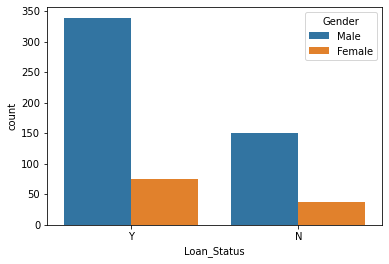

In [446]:
print(pd.crosstab(train['Gender'],train['Loan_Status']))

sns.countplot(x = 'Loan_Status', data= train, hue = 'Gender')

Loan Approval:

37 Females got a No

75 females got a yes

150 Males got a no

339 Males got a yes

Married

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

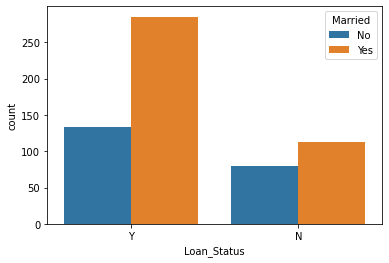

In [447]:
print(pd.crosstab(train['Married'], train['Loan_Status']))

sns.countplot(x = 'Loan_Status', data = train, hue = 'Married')

Loan Approval:

79 Of non-married people got a no

134 of non-married people got a yes

113 of married people got a no 

285 of married people got a yes

Loan and dependents

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

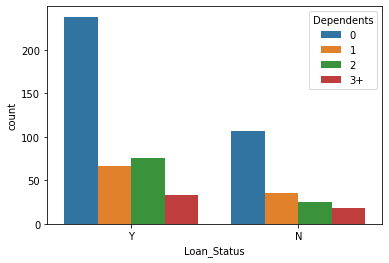

In [448]:
print(pd.crosstab(train['Dependents'],train['Loan_Status']))

sns.countplot(x = 'Loan_Status',data = train, hue = 'Dependents')

Loan status and education

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

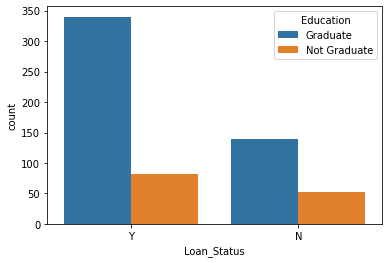

In [449]:
print(pd.crosstab(train['Education'], train['Loan_Status']))

sns.countplot(x = 'Loan_Status', data = train, hue = 'Education')

140 of the graduates loan status was not approved

340 of the graduates loan status was approved

52 of non-graduates loan status was not approved

82 of non-graduates loan status was approved

Loan status and self-employed

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

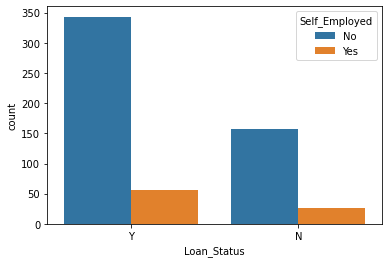

In [450]:
print(pd.crosstab(train['Self_Employed'], train['Loan_Status']))

sns.countplot(x = 'Loan_Status', data = train, hue = 'Self_Employed')

157 people who are not self employed got a no for their loan approval

343 people who are not self employed got a yes for their loan approval

26 self employed people got a no for their loan approval

56 self employed individuals got a yes for their loan approval

Loan approval and credit history

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

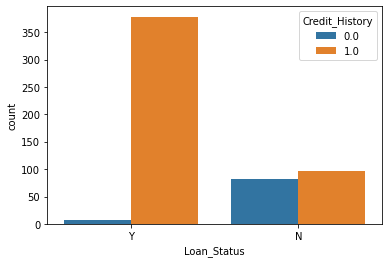

In [451]:
print(pd.crosstab(train['Credit_History'], train['Loan_Status']))

sns.countplot(x = 'Loan_Status', data = train, hue= 'Credit_History')

People with credit history as 1 and loan was approved were 378

People with credit history as 1 and loan was not approved were 97

People with credit history as 0 and loan was approved were 7

People with credit history as 0 and loan was not appproved were 82

Loan status and property area


Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

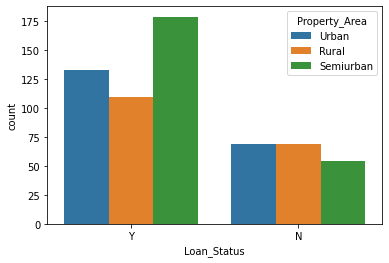

In [452]:
print(pd.crosstab(train['Property_Area'], train['Loan_Status']))

sns.countplot(x='Loan_Status', data = train, hue = 'Property_Area')

People in the rural area and loan was approved 110

People in the rural area and loan was not approved 69

People in the semiurban area and loan was approved 179

People in the semiurban area and loan was not approved 54

People in the urban area and loan was approved 133

people in the urban and loan was not approved 69

Proportion of loans being approved in the semi-urban areas is high compared to both rural and urban areas

# NUMERIC INDEPENDENT VARIABLE

Loan status and applicants income

In [453]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [454]:
print(pd.crosstab(train['ApplicantIncome'],train['Loan_Status']))

Loan_Status      N  Y
ApplicantIncome      
150              1  0
210              0  1
416              1  0
645              0  1
674              0  1
...             .. ..
39147            0  1
39999            0  1
51763            0  1
63337            0  1
81000            1  0

[505 rows x 2 columns]


<AxesSubplot:xlabel='Loan_Status'>

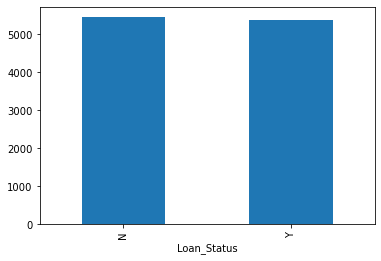

In [455]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the mean income is represented in the y-axis and we are not able to see any change in the mean income. We therefore have to make bins of values in the applicants income and analyse using those bins.

In [456]:
train['ApplicantIncome'].median()

3812.5

In [457]:
bins = [0, 2500,4000,6000,81000]
group = ['Low', 'Average','High','Very High']
train['Income_cut'] = pd.cut(train['ApplicantIncome'], bins, labels = group)
train['Income_cut'].head()


0       High
1       High
2    Average
3    Average
4       High
Name: Income_cut, dtype: category
Categories (4, object): ['Low' < 'Average' < 'High' < 'Very High']

Loan_Status   N    Y
Income_cut          
Low          34   74
Average      67  159
High         45   98
Very High    46   91


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

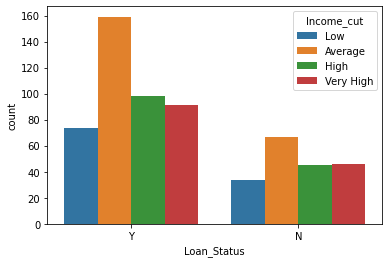

In [458]:
print(pd.crosstab(train['Income_cut'], train['Loan_Status']))

sns.countplot(x = 'Loan_Status', data = train, hue = 'Income_cut')

People earning an average pay, had the most loan approval of 159 compared to other income bin ranges. Its evident though that applicant income is not a major factor influencing loan approvals.





# Co-Applicant Income and loan approval

<AxesSubplot:xlabel='Loan_Status'>

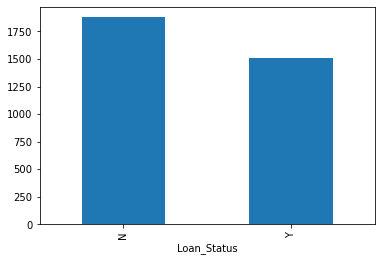

In [459]:
train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot(kind = 'bar')

In [460]:
train['CoapplicantIncome'].mean()

1621.245798027101

In [461]:
train['CoapplicantIncome'].max()

41667.0

Loan_Status          N    Y
Coapplicant_income         
Low                 53  161
Average             24   48
High                14   32
Very high            5    4


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

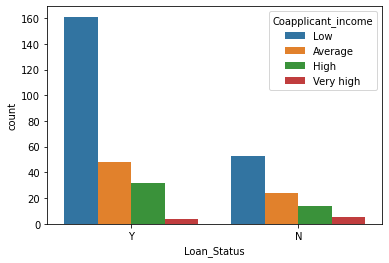

In [462]:
bins= [0, 2500, 4000, 8000, 42000]
group = ['Low', 'Average', 'High', 'Very high']
train['Coapplicant_income'] = pd.cut(train['CoapplicantIncome'], bins, labels= group)
print(pd.crosstab(train['Coapplicant_income'], train['Loan_Status']))
sns.countplot(x = 'Loan_Status', data = train, hue = 'Coapplicant_income')

We can see that people with co-applicants who's income is less tend to have high chances of loan approval, which doesn't sit right. We can conclude that the reason why its that way is because most people applying for loans do not have coapplicants and so its 0 and hence the loan approval is not dependent on it.

We can make a new variable(Combination of applicants income and co-applicant income) to visualize the effect of the total income on loan approval.

In [463]:
train['Totalincome'] = train['CoapplicantIncome'] + train['ApplicantIncome']
train['Totalincome'].head()

0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: Totalincome, dtype: float64

Loan_Status    N    Y
total_income         
Low           14   10
Average       32   87
High          65  159
Very High     81  166


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

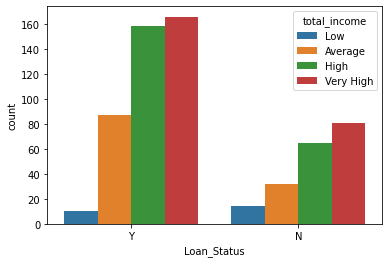

In [464]:
bins = [0, 2500, 4000, 6000, 81000]
groups = ['Low', 'Average', 'High', 'Very High']
train['total_income'] = pd.cut(train['Totalincome'], bins, labels= groups)

print(pd.crosstab(train['total_income'], train['Loan_Status']))
sns.countplot(x = 'Loan_Status', data = train, hue = 'total_income')

We can tell that people with low income have less loan approvals compared to average, high and very high income earners.


# Relation between loan status and loan amount

In [465]:
train['LoanAmount'].max()

700.0

<AxesSubplot:xlabel='Loan_Status'>

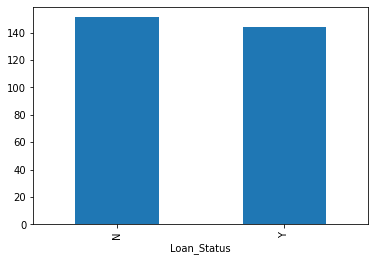

In [466]:
train.groupby('Loan_Status')['LoanAmount'].mean().plot(kind = 'bar')

In [467]:
bins = [0,100,200,400,700]
labels = ['low', 'Average', 'high', 'very high']
train['LoanAmount_cut'] = pd.cut(train['LoanAmount'], bins, labels= labels)
train['LoanAmount_cut'].head(3)

0        NaN
1    Average
2        low
Name: LoanAmount_cut, dtype: category
Categories (4, object): ['low' < 'Average' < 'high' < 'very high']

Loan_Status       N    Y
LoanAmount_cut          
low              47  107
Average         103  255
high             27   39
very high         4   10


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

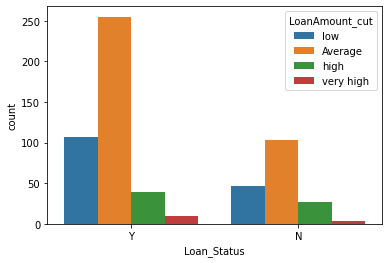

In [468]:
print(pd.crosstab(train['LoanAmount_cut'],train['Loan_Status']))
sns.countplot(x = 'Loan_Status', data = train, hue = 'LoanAmount_cut')

It is evident that the proportion of loan approved in low and average sections is high as compared to the high and very high sections. This therefore proves our hypothesis that the lower the loan amount the higher the chances of approval

Let's drop the columns we have created, to remove the noise in our data

In [469]:
train = train.drop(['Income_cut', 'total_income', 'LoanAmount_cut','Coapplicant_income'], axis = 1)


Now we look at how our numeric data is correlated. We will use a heat map the darker the color the more correlated our variables are.

In [474]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Totalincome        614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


<AxesSubplot:>

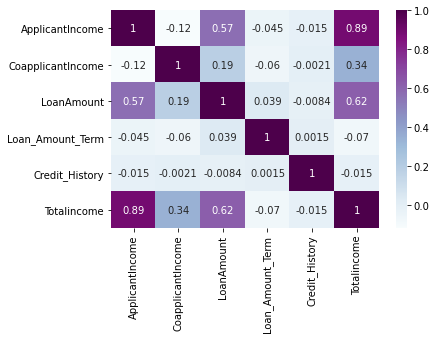

In [476]:
sns.heatmap(train.corr(),cmap = 'BuPu', annot= True)

We can see that the most correlated variable is loan amount and applicant income


# MISSING VALUES AND OUTLIERS

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

In [477]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Totalincome        614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


In [478]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Totalincome           0
dtype: int64

There are missing values in Gender, Married,dependents,Selfemployed, Loan amount,loan amount term,credit history

We will be treating missing values one by one

We can consider the following:
    
We can treat categorical variables by computing with the mode 

We can treat numerical variables by computing with pmean or median

In [479]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)

In [480]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [481]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)

In [483]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

In [484]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Totalincome          0
dtype: int64

In [485]:
test.isnull().sum()

Loan_ID                      0
Gender                      11
Married                      0
Dependents                  10
Education                    0
Self_Employed               23
ApplicantIncomeMonthly       0
CoapplicantIncomeMonthly     0
LoanAmountThousands          5
Loan_Amount_Term_Months      6
Credit_History              29
Property_Area                0
dtype: int64

In [486]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)

In [487]:
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)

In [488]:
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['LoanAmountThousands'].fillna(test['LoanAmountThousands'].mode()[0],inplace = True)
test['Loan_Amount_Term_Months'].fillna(test['Loan_Amount_Term_Months'].mode()[0], inplace = True)

In [489]:
test.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncomeMonthly      0
CoapplicantIncomeMonthly    0
LoanAmountThousands         0
Loan_Amount_Term_Months     0
Credit_History              0
Property_Area               0
dtype: int64

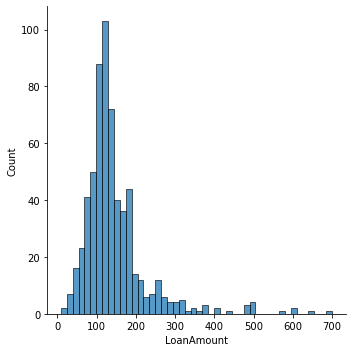

In [490]:
sns.displot(train['LoanAmount'])

<AxesSubplot:>

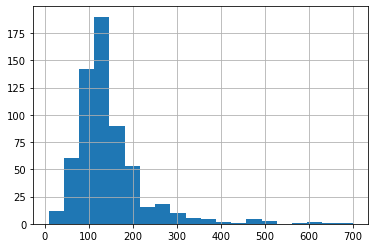

In [491]:
train['LoanAmount'].hist(bins = 20)

Due to this outliers, most of the data is on the left and the tail is longer on the right side. This is called right skewness.

One way to remove the skewness is to do the log transformation. As we take the log transformation does not affect the small values but it reduces the large numbers into smaller values.With that we get a something similar to a normal distribution.

<AxesSubplot:>

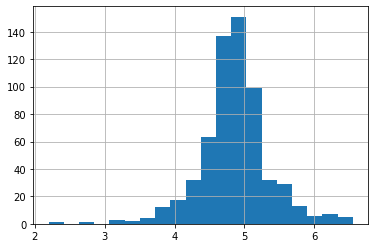

In [492]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins = 20)

<AxesSubplot:>

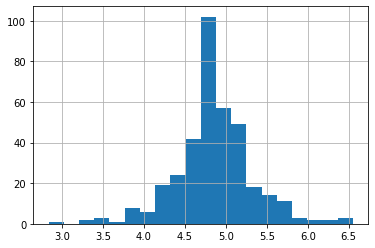

In [493]:
test['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'].hist(bins = 20)

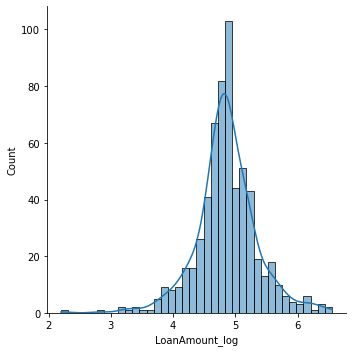

In [494]:
 sns.displot(train['LoanAmount_log'], kde = True)

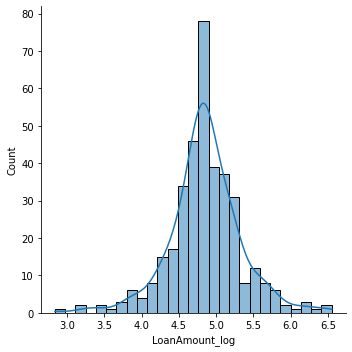

In [495]:
sns.displot(test['LoanAmount_log'], kde = True)

# FEATURE ENGINEERING

Based on domain knowledge we can create new features that might affect our target variable. We can create 3 variables

Total Income - We can combine applicants income and coapplicants income like we did in bivariate analysis. Our hypothesis on this is the higher the total income the higher the chances of loan approval.

EMI - Monthly amount to be paid by the loan applicant to repay the loan. The idea behind this is, the greater the EMI : the higher the chances that the loan applicant will not be able to pay the loan. We can calculate the EMI by getting the ratio of loan amount with respect to loan amount term.

Balance income - This is the income that has been left after paying the EMI. Idea behind this is that the higher the balance income then the higher the chance of the applicant to pay the loan, hence increasing the chances of loan approval.

In [496]:
train['Total_Income'] = train['CoapplicantIncome'] + train['ApplicantIncome']
train['Total_Income'].head(5)

0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: Total_Income, dtype: float64

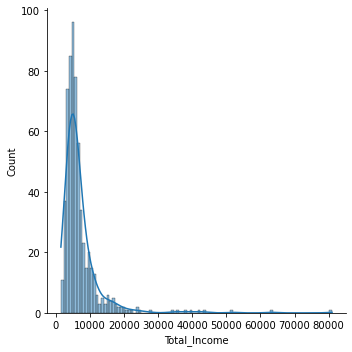

In [497]:
sns.displot(train['Total_Income'], kde = True)

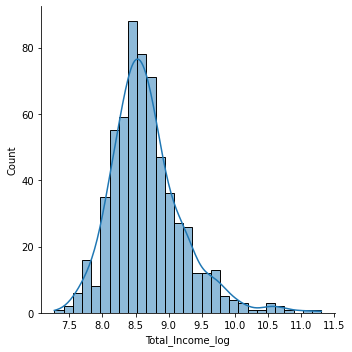

In [498]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.displot(train['Total_Income_log'], kde = True)

In [499]:
test['Total_Income'] = test['ApplicantIncomeMonthly']+ test['CoapplicantIncomeMonthly']

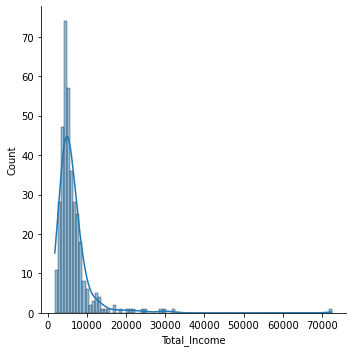

In [500]:
sns.displot(test['Total_Income'], kde = 'True')

The data is rightly skewed we need to deal with the outliers

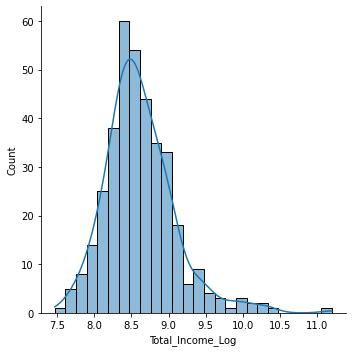

In [501]:
test['Total_Income_Log'] = np.log(test['Total_Income'])
sns.displot(test['Total_Income_Log'],kde = True)

# EMI

Now we create the EMI feature

In [502]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = train['LoanAmount']/ train['Loan_Amount_Term']

In [503]:
train['EMI'].head()

0    0.355556
1    0.355556
2    0.183333
3    0.333333
4    0.391667
Name: EMI, dtype: float64

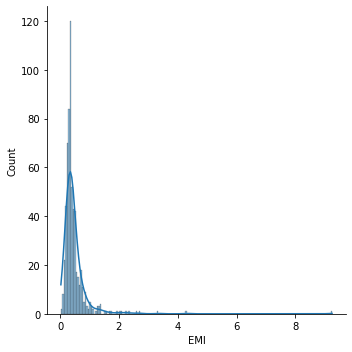

In [504]:
sns.displot(train['EMI'], kde = True)

0    0.355556
1    0.355556
2    0.183333
3    0.333333
4    0.391667
Name: EMI, dtype: float64


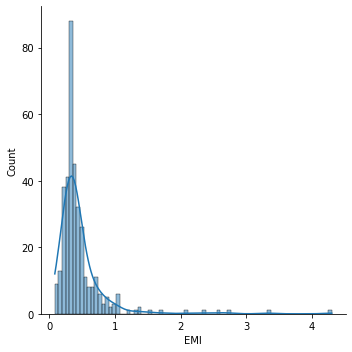

In [505]:
print(test['EMI'].head())

sns.displot(test['EMI'], kde = True)

# BALANCE INCOME

In [508]:
train['Balance_Income'] = train['Total_Income'] - train['EMI']*1000
test['Balance_Income'] = test['Total_Income'] - test['EMI']*1000

In [509]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Totalincome', 'LoanAmount_log', 'Total_Income', 'Total_Income_log',
       'EMI', 'Balance_Income'],
      dtype='object')

In [510]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)

In [512]:
train = train.drop(['Totalincome'],axis =1)

In [513]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Gender            614 non-null    object 
 2   Married           614 non-null    object 
 3   Dependents        614 non-null    object 
 4   Education         614 non-null    object 
 5   Self_Employed     614 non-null    object 
 6   Credit_History    614 non-null    float64
 7   Property_Area     614 non-null    object 
 8   Loan_Status       614 non-null    object 
 9   LoanAmount_log    614 non-null    float64
 10  Total_Income      614 non-null    float64
 11  Total_Income_log  614 non-null    float64
 12  EMI               614 non-null    float64
 13  Balance_Income    614 non-null    float64
dtypes: float64(6), object(8)
memory usage: 67.3+ KB


In [515]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Loan_ID                   367 non-null    object 
 1   Gender                    367 non-null    object 
 2   Married                   367 non-null    object 
 3   Dependents                367 non-null    object 
 4   Education                 367 non-null    object 
 5   Self_Employed             367 non-null    object 
 6   ApplicantIncomeMonthly    367 non-null    int64  
 7   CoapplicantIncomeMonthly  367 non-null    int64  
 8   LoanAmountThousands       367 non-null    float64
 9   Loan_Amount_Term_Months   367 non-null    float64
 10  Credit_History            367 non-null    float64
 11  Property_Area             367 non-null    object 
 12  LoanAmount_log            367 non-null    float64
 13  Total_Income              367 non-null    int64  
 14  Total_Inco

In [516]:
test = test.drop(['ApplicantIncomeMonthly', 'CoapplicantIncomeMonthly', 'LoanAmountThousands', 'Loan_Amount_Term_Months', 'Total_Income'], axis = 1)

In [517]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           367 non-null    object 
 1   Gender            367 non-null    object 
 2   Married           367 non-null    object 
 3   Dependents        367 non-null    object 
 4   Education         367 non-null    object 
 5   Self_Employed     367 non-null    object 
 6   Credit_History    367 non-null    float64
 7   Property_Area     367 non-null    object 
 8   LoanAmount_log    367 non-null    float64
 9   Total_Income_Log  367 non-null    float64
 10  EMI               367 non-null    float64
 11  Balance_Income    367 non-null    float64
dtypes: float64(5), object(7)
memory usage: 34.5+ KB


# MODEL BUILDING

Now we can continue the model building process. We can start with Logistic regression, Decision tree, random forest and then xgboost 

# Logistic regression

Lets first prepare our data. We can drop the loan_id column in both the train and test data set

In [519]:
train = train.drop(['Loan_ID'], axis = 1)
test = test.drop(['Loan_ID'], axis = 1)

In [520]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.852030,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,6091.0,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,3000.0,8.006368,0.183333,2816.666667
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,4941.0,8.505323,0.333333,4607.666667
4,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,6000.0,8.699515,0.391667,5608.333333


In [521]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,Total_Income_Log,EMI,Balance_Income
0,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,8.651724,0.355556,5364.444444
1,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,8.428581,0.355556,4220.444444
2,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,8.824678,0.183333,6616.666667
3,Male,Yes,2,Graduate,No,1.0,Urban,4.787492,8.494129,0.333333,4552.666667
4,Male,No,0,Not Graduate,No,1.0,Urban,4.948760,8.094378,0.391667,2884.333333


We will use sklearn to get some of the models we will use to predict.

Sklearn requires the target variable in a different dataset therefore we will drop it from our train dataset and save it in another

In [522]:
 X = train.drop(['Loan_Status'], axis = 1)

In [524]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,4.85203,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,4.85203,6091.0,8.714568,0.355556,5735.444444


In [525]:
y = train['Loan_Status']

In [526]:
y.head(2)

0    Y
1    N
Name: Loan_Status, dtype: object

For analysis purposes we have to get dummies for categorical variables.

Logistic regression use numerical values, therefore for example for gender we have to categories it into either 1 or 0.

Once we apply dummies on this variable we will get (Gender_male  and gender_female)
Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.



In [527]:
X = pd.get_dummies(X)

In [528]:
X.head(2)

,Credit_History,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.85203,5849.0,8.674026,0.355556,5493.444444,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,1.0,4.85203,6091.0,8.714568,0.355556,5735.444444,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0


In [529]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [530]:
train.head(1)

,Credit_History,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,1.0,4.85203,5849.0,8.674026,0.355556,5493.444444,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1


In [534]:
test.head(2)

,Credit_History,LoanAmount_log,Total_Income_Log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.85203,8.651724,0.355556,5364.444444,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,1.0,4.85203,8.428581,0.355556,4220.444444,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1


Now we can train our model using the train dataset and make predictions using the test data set. We can also validate our predictions by dividing our training data into two train and validation. We can use the the training part to train the model and make predictions for the validation bit. In this way we can validate our predictions (Since we don't have that in the test data)


In [564]:
from sklearn.model_selection import train_test_split

In [565]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# TRAIN THE MODEL

In [566]:
from sklearn.linear_model import LogisticRegression

In [567]:
lm = LogisticRegression()

In [568]:
lm.fit(X_train,y_train)

LogisticRegression()

# MODEL EVALUATION

In [569]:
print(lm.intercept_)

[-0.01860169]


In [570]:
pred = lm.predict(X_test)

Now we calculate our predictions scores

In [571]:
from sklearn.metrics import accuracy_score

In [572]:
predictions = accuracy_score(y_test, pred)*100
predictions

77.83783783783784

Our predictions for our logistic regression is 78% accurate.


# Desicion tree

Lets import desicion tree classifier.

In [552]:
from sklearn.tree import DecisionTreeClassifier

In [553]:
dt = DecisionTreeClassifier()

In [554]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [555]:
preds = dt.predict(X_test)

In [557]:
predict = accuracy_score(y_test, preds)*100
predict

70.27027027027027

Our predictions for decision tree is 70% accurate

# Random forest 

RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model. 

For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.

Final prediction can be a function of all the predictions made by the individual learners


In [558]:
from sklearn.ensemble import RandomForestClassifier

In [559]:
rfc = RandomForestClassifier()

In [560]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [561]:
random = rfc.predict(X_test)

In [562]:
predicts = accuracy_score(y_test, random)*100
predicts

75.13513513513513

Our random forest classifier model prediction is 75%

Our predictions are : 
    
Logistic regressions - 78% accurate

Decision tree - 70% accurate

Random forest - 75% accurate

# Finding the important feature

Next step is to find the feature importance. And since 'Logistic regression' doesn't have the feature importance attribute we will go with the second best performing model builder, which in our case is the random forest that was 75% accurate.

Using the random forest we can get the most important feature in our feature variables.

<AxesSubplot:>

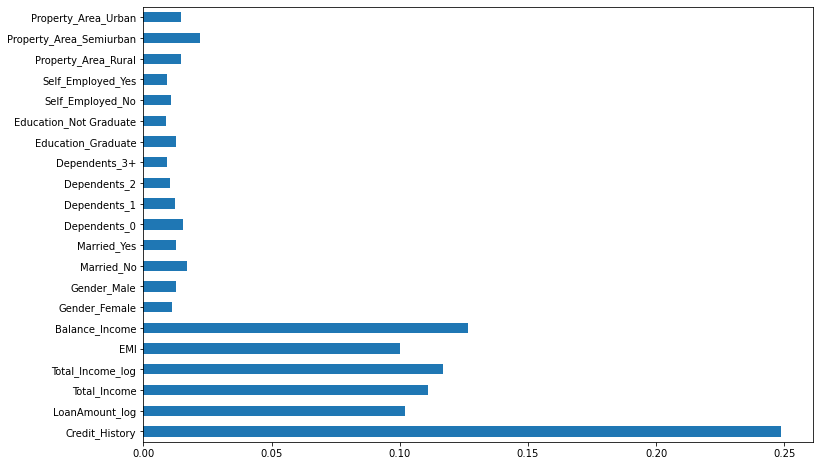

In [575]:
importances = pd.Series(rfc.feature_importances_, index= X.columns)
importances.plot(kind = 'barh', figsize = (12,8))

We can conclude that the 2 most important features are Credit history and balance income. This is evident that feature engineering helped us in predicting our target variable.